In [1]:
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="AppleGothic ")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐

from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import pytesseract
import imutils

In [2]:
def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

def vid_info(path, codec, name, fps):
    cap = cv2.VideoCapture(path)
    print(cap)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

    #재생할 파일의 높이 얻기
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    #재생할 파일의 프레임 레이트 얻기
    # fps = cap.get(cv2.CAP_PROP_FPS)
    
    #codec
    fourcc = cv2.VideoWriter_fourcc(*codec)
    
    #filename
    filename = name+'.mp4'
    
    #out 
    out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
    
    print('cap {0}, width {1}, height {2}, fps {3}'.format(cap, width, height, fps))
    print('codec {0}', 'filename {1}'.format(fourcc, filename))
    
    return cap, width, height, fps, fourcc, filename, out


### Find Starting Point & listing_img

In [3]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/basic.mp4')

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

back_org = back.copy()
if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)

# 비디오 매 프레임 처리
start_basic_list =[]
basic_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]
    frame_org = frame.copy()

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_basic_list.append(frame_num)
        basic_img_list.append(frame)
       
    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

width 680, height 1080, fps 29.97002997002997


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


-1

In [10]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/post.mp4')


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_post_list =[]
post_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_post_list.append(frame_num)
        post_img_list.append(frame)

    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [4]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/added.mp4')


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_add_list =[]
add_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_add_list.append(frame_num)
        add_img_list.append(frame)

    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [12]:
cap = cv2.VideoCapture('/Users/kimmonica/Documents/Train_Diff/train_diff/org/testing_vid/location.mp4')


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()

if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)
back = back[0:1080, 610:1320]
back = back[400:600, 20:680]

# 비디오 매 프레임 처리
start_loc_list =[]
loc_img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame = frame[0:1080, 610:1320]
    frame = frame[400:600, 20:680]

    # if not ret:
    #     break

    # basic_img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        start_loc_list.append(frame_num)
        loc_img_list.append(frame)

    cv2.imshow('frame', frame)
    # out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [13]:
print(len(basic_img_list))
print(len(post_img_list))
print(len(add_img_list))
print(len(loc_img_list))

2418
2543
2998
2653


### histogram

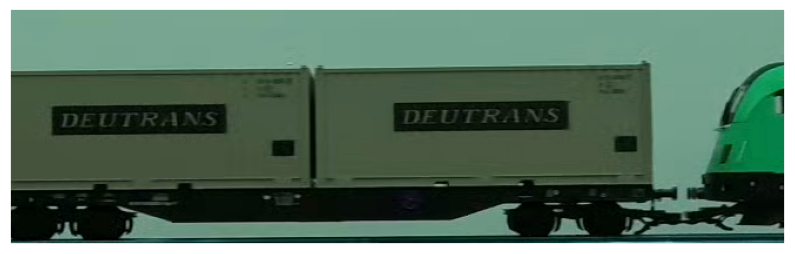

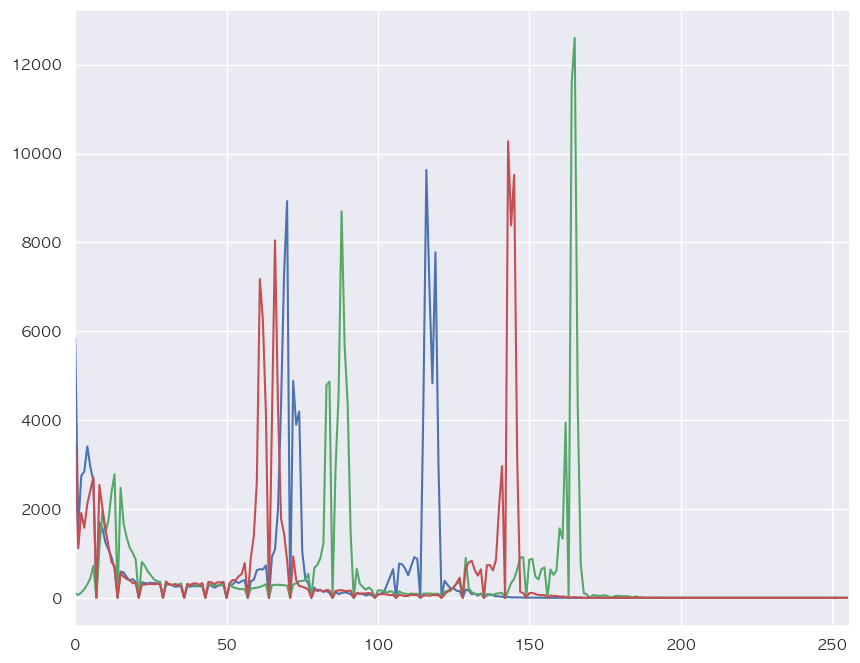

In [29]:
img = basic_img_list[700].copy()
show(img)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### panorama

In [9]:
stiching_list =[]
for i in range(len(basic_img_list)):
    try:
        num = i *10

        stiching_list.append (basic_img_list[num])
    except:
        break

print(len(stiching_list))

242


In [ ]:
for i in st

In [5]:
stiching_list_test = stiching_list[:3]

In [9]:
stitcher = cv2.Stitcher_create()

# 이미지 스티칭
status, dst = stitcher.stitch(stiching_list)

if status != cv2.Stitcher_OK:
    print('Stitch failed!')
    sys.exit()

cv2.imwrite('output.jpg', dst)

# 출력 영상이 화면보다 커질 가능성이 있어 WINDOW_NORMAL 지정
cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.imshow('dst',dst)

cv2.destroyAllWindows()
cv2.waitKey(1)
# cv2.waitKey(1)
# cv2.waitKey(1)
# cv2.waitKey(1)

** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number 

In [ ]:

# 불러온 영상을 imgs에 저장
imgs = []
for name in basic_img_list[350:353]:
    img = cv2.imread(name)
    
    if img is None:
        print('Image load failed!')
        sys.exit()
        
    imgs.append(img)
    
# 객체 생성
stitcher = cv2.Stitcher_create()

# 이미지 스티칭
status, dst = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    print('Stitch failed!')
    sys.exit()
    
# 결과 영상 저장
cv2.imwrite('output.jpg', dst)

# 출력 영상이 화면보다 커질 가능성이 있어 WINDOW_NORMAL 지정
cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

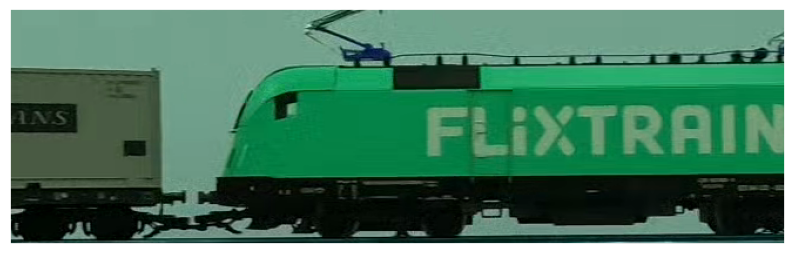

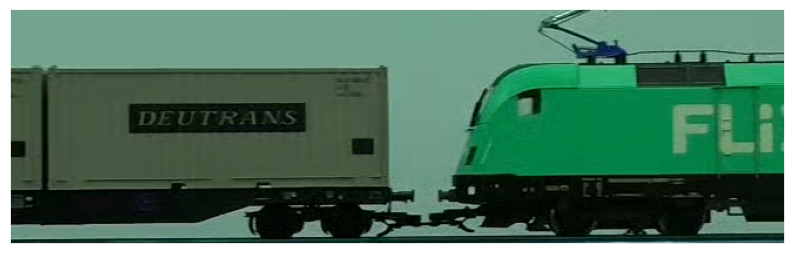

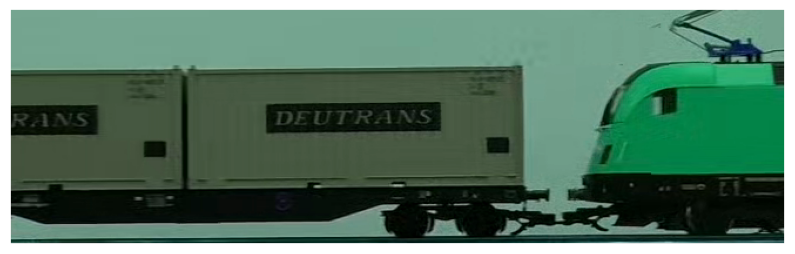

In [54]:
show(basic_img_list[350])
show(basic_img_list[500])
show(basic_img_list[600])

In [55]:
stiching_list =[]

stiching_list.append(basic_img_list[350])
stiching_list.append(basic_img_list[500])
stiching_list.append(basic_img_list[600])

In [58]:
stitcher = cv2.Stitcher_create()

# 이미지 스티칭
status, dst = stitcher.stitch(basic_img_list)
if status != cv2.Stitcher_OK:
    print('Stitch failed!')
    sys.exit()

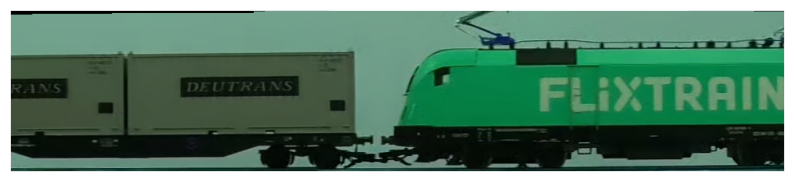

In [57]:
show(dst)

In [44]:
dst